<a href="https://colab.research.google.com/github/logs123/MAT421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 20. Numerical Differentiation**

### **20.1 Numerical Differentiation Problem Statement**

A **numerical grid** is an evenly spaced set of points over the domain of a function, over some interval.

The **spacing** or **step size** of a numerical grid is the distance between adjacent points on the grid.

A **discrete** or **discretized representation** is useful for numerical calculations and corresponds to data sets that may be acquired in engineering and science practice.

In [7]:
# Generate a numerical grid in one dimension.

import numpy as np

print(np.linspace(-2,2))

[-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]


### **20.2 Finite Difference Approximating Derivatives**

In **finite difference** approximations of this slope, we can use values of the function in the neighborhood of the point 𝑥=𝑎 to achieve the goal.

The **forward difference** is to estimate the slope of the function at 𝑥𝑗 using the line that connects (𝑥𝑗,𝑓(𝑥𝑗)) and (𝑥𝑗+1,𝑓(𝑥𝑗+1)): 𝑓′(𝑥𝑗)=(𝑓(𝑥𝑗+1)−𝑓(𝑥𝑗))/(𝑥𝑗+1−𝑥𝑗).

The **backward difference** is to estimate the slope of the function at 𝑥𝑗 using the line that connects (𝑥𝑗−1,𝑓(𝑥𝑗−1)) and (𝑥𝑗,𝑓(𝑥𝑗)): 𝑓′(𝑥𝑗)=(𝑓(𝑥𝑗)−𝑓(𝑥𝑗−1))/(𝑥𝑗−𝑥𝑗−1).

The **central difference** is to estimate the slope of the function at 𝑥𝑗 using the line that connects (𝑥𝑗−1,𝑓(𝑥𝑗−1)) and (𝑥𝑗+1,𝑓(𝑥𝑗+1)): 𝑓′(𝑥𝑗)=(𝑓(𝑥𝑗+1)−𝑓(𝑥𝑗−1))/(𝑥𝑗+1−𝑥𝑗−1).

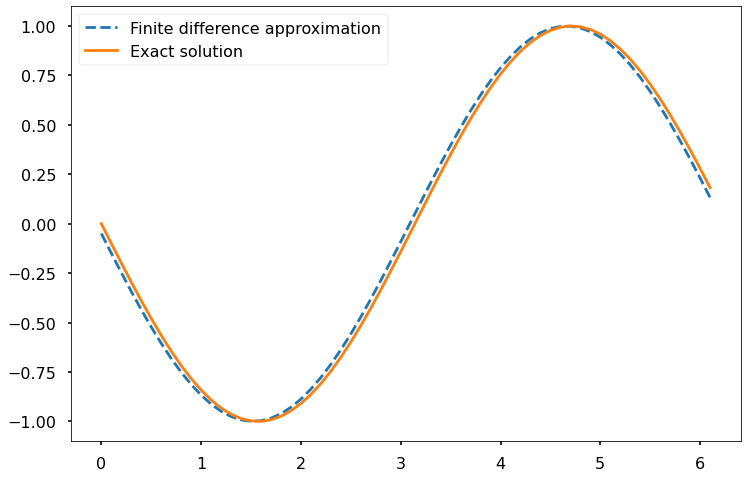

0.049984407218554114


In [2]:
# Consider the function f(x)=cox(x). Compute the derivatives numerically.

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

h = 0.1
x = np.arange(0, 2*np.pi, h)
y = np.cos(x) 

forward_diff = np.diff(y)/h
x_diff = x[:-1:]
exact_solution = -np.sin(x_diff) 

plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

max_error = max(abs(exact_solution - forward_diff))
print(max_error)

### **20.3 Approximating of Higher Order Derivatives**

We use Taylor series to approximate higher order derivatives and get 𝑓″(𝑥𝑗)≈(𝑓(𝑥𝑗+1)−2𝑓(𝑥𝑗)+𝑓(𝑥𝑗−1))/(ℎ^2).

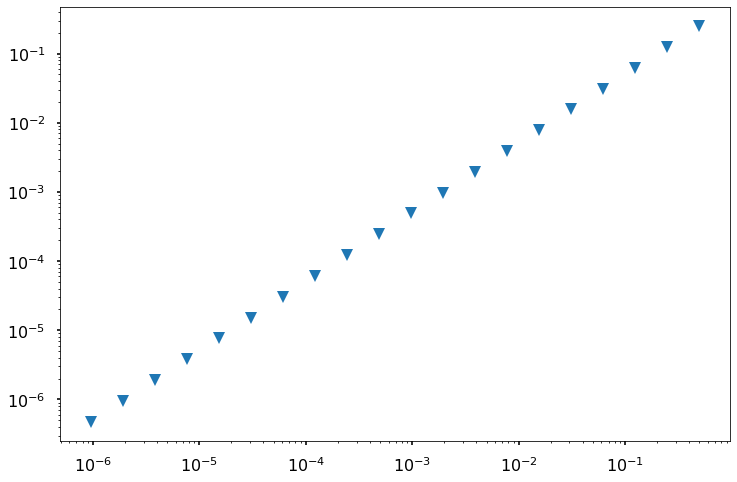

In [8]:
h = 1
iterations = 20
step_size = []
max_error = [] 

for i in range(iterations):
    h /= 2
    step_size.append(h)
    x = np.arange(0, 2 * np.pi, h)
    y = np.cos(x)
    forward_diff = np.diff(y)/h
    x_diff = x[:-1]
    exact_solution = -np.sin(x_diff) 

    max_error.append(\
            max(abs(exact_solution - forward_diff)))

plt.figure(figsize = (12, 8))
plt.loglog(step_size, max_error, 'v')
plt.show()

### **20.4 Numerical Differentiation with Noise**

Sometimes data can be contaminated with **noise**, meaning its value is off by a small amount from what it would be if it were computed from a pure mathematical function.

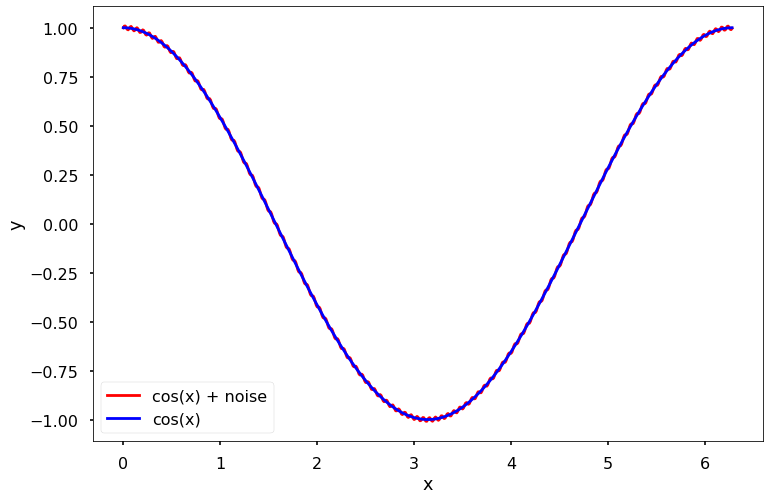

In [3]:
# Plot f_𝜖,𝜔(x) for 𝜖=0.01 and 𝜔=100.

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

x = np.arange(0, 2*np.pi, 0.01) 
# compute function
omega = 100
epsilon = 0.01

y = np.cos(x) 
y_noise = y + epsilon*np.sin(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()